## Uppgift 1 - uppvärmning covid-19 data
- Börja med att manuellt läsa Excel-filerna och de olika bladen i varje dokument. Använd därefter Pandas för
att läsa in bladet: "Veckodata Riket" i covid19-filen.

In [2]:
import pandas as pd
import plotly_express as px
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


df = pd.read_excel("../Data/Folkhalsomyndigheten_Covid19.xlsx")
df.head()


,Statistikdatum,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,2020-02-04,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = pd.read_excel("../Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")
df

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2022,38,4669,45,93,2585507,24910,22,9475,88,8.5,20303,1956.099976
138,2022,39,13532,130,175,2599039,25041,15,9490,92,8.9,20395,1965.000000
139,2022,40,3999,39,169,2603038,25079,19,9509,88,8.5,20483,1973.400024
140,2022,41,3408,33,72,2606446,25112,13,9522,73,7.0,20556,1980.500000


-  a) Gör initial dataanalys för att snabbt få en överblick över datasetet. Använd metoder som ex. info(),
describe(), value_counts(), head(), columns, index för att snabbt få en överblick.

In [4]:
df.info() # print summary of Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [5]:
df.describe() # generate descriptive statistics

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


In [6]:
df["år"].value_counts() # counts the  unique values in dataframe

2021    52
2020    48
2022    42
Name: år, dtype: int64

In [7]:
df.value_counts(normalize =True)

år    veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  Antal_nyaintensivvårdade_vecka  Kum_antal_intensivvårdade  Antal_avlidna_vecka  Antal_avlidna_milj_inv_vecka  Kum_antal_avlidna  Kum_antal_avlidna_milj_inv
2020  6            1                 0                           0                             1               0                   0                               0                          0                    0.000000                      0                  0.000000                      0.007042
2021  50           24485             236                         416                           1260348         12143               66                              8152                       49                   4.700000                      15259              1470.099976                   0.007042
      44           5060              49                          106                           1178586         1135

In [8]:
df.head() # return the first five rows

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [9]:
df.columns # print the column labels of the DataFrame

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

In [10]:
df.index # rows staring from 0 , increment by 1 and ending on  index before 142

RangeIndex(start=0, stop=142, step=1)

In [11]:
pd.Index(df["år"])

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='år', length=142)

- b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" med följande format:
```
Vecka
2020v6
2020v7
...
2022v41
```


In [12]:
# Adding is string and other two are int : so convert it using astype(str) command
df["Vecka"] = df["år"].astype(str) + "V" + df["veckonummer"].astype(str)

df["Vecka"]

0       2020V6
1       2020V7
2       2020V8
3       2020V9
4      2020V10
        ...   
137    2022V38
138    2022V39
139    2022V40
140    2022V41
141    2022V42
Name: Vecka, Length: 142, dtype: object

För deluppgifterna c-f, använd både Seaborn och Plotly express. För Seaborn, använd subplots så du får
2x2 grid med graferna.
- c) Rita en linjediagram som visar avlidna fall per vecka från 2020v6 till nu.


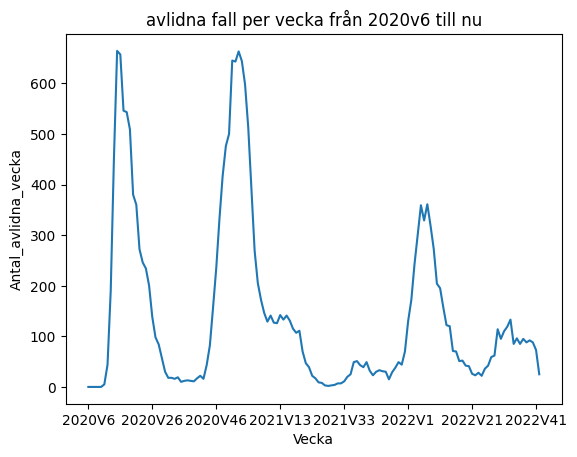

In [30]:
# använd Seaborn
ax = plt.axes()

sns.lineplot(data= df, x="Vecka", y="Antal_avlidna_vecka", ax = ax)
ax.set(title = "avlidna fall per vecka från 2020v6 till nu")
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

In [18]:
 # använd Plotly express
fig = px.line(
    df,
    x="Vecka",
    y="Antal_avlidna_vecka",
    
    title="avlidna fall per vecka från 2020v6 till nu",
    labels=dict(Vecka="Vecka", Antal_avlidna_vecka="Antal_avlidna_vecka")
)
fig.show()

- d) Rita en linjediagram som visar nya fall per vecka från 2020v6 till nu.

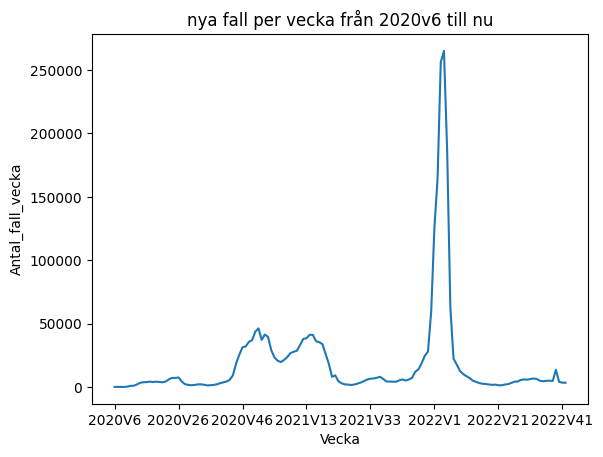

In [34]:
# använd Seaborn
ax = plt.axes()

sns.lineplot(data= df, x="Vecka", y="Antal_fall_vecka",ax = ax)
ax.set(title = "nya fall per vecka från 2020v6 till nu")
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

In [35]:
# använda plotly
fig = px.line(df, x = "Vecka", y ="Antal_fall_vecka", title = "nya fall per vecka från 2020v6 till nu")
fig.show()

- e) Rita linjediagram av både avlidna fall per vecka och nya fall per vecka i samma fönster från 2020v6 till
nu.

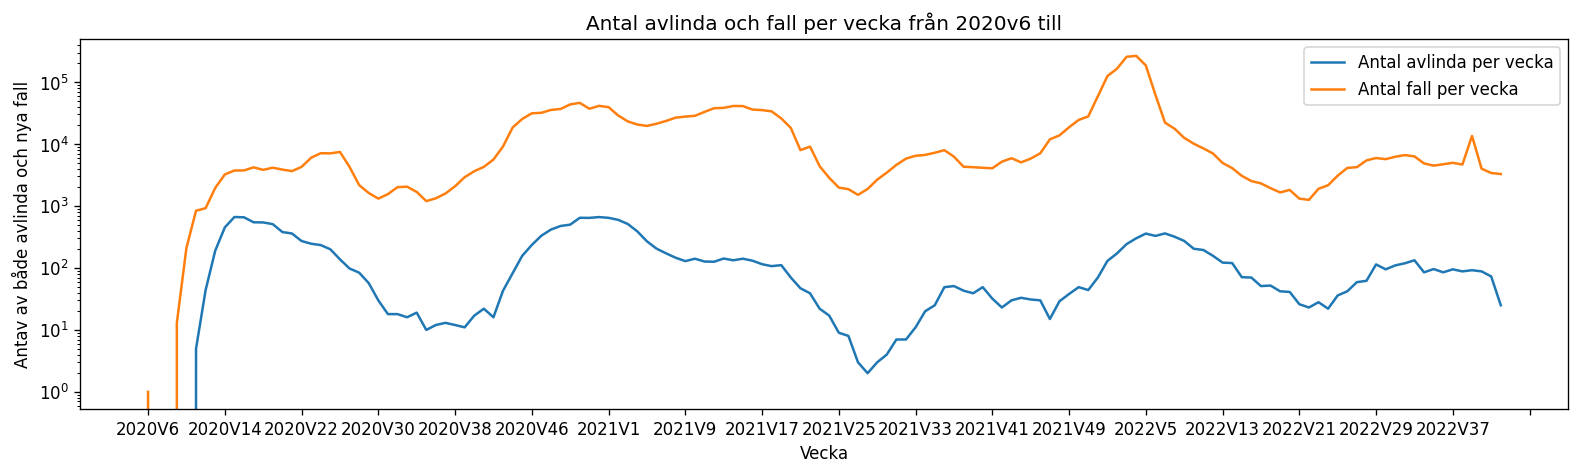

In [58]:
fig, ax = plt.subplots(figsize=(16, 4), dpi=120)



ax1 = sns.lineplot(x = "Vecka", y = "Antal_avlidna_vecka", data=df, label= "Antal avlinda per vecka", ax = ax)
ax2 = sns.lineplot(x = "Vecka", y = "Antal_fall_vecka", data=df, label="Antal fall per vecka", ax = ax)

ax.set(xlabel = "Vecka", ylabel = "Antav av både avlinda och nya fall",title = "Antal avlinda och fall per vecka från 2020v6 till")
ax.xaxis.set_major_locator(plt.MaxNLocator(25))
ax2.set_yscale("log")


In [47]:
fig = px.line(df, x="Vecka", y=["Antal_avlidna_vecka", "Antal_fall_vecka"], title= "Antal avlinda och fall per vecka från 2020v6 till nu")
fig.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

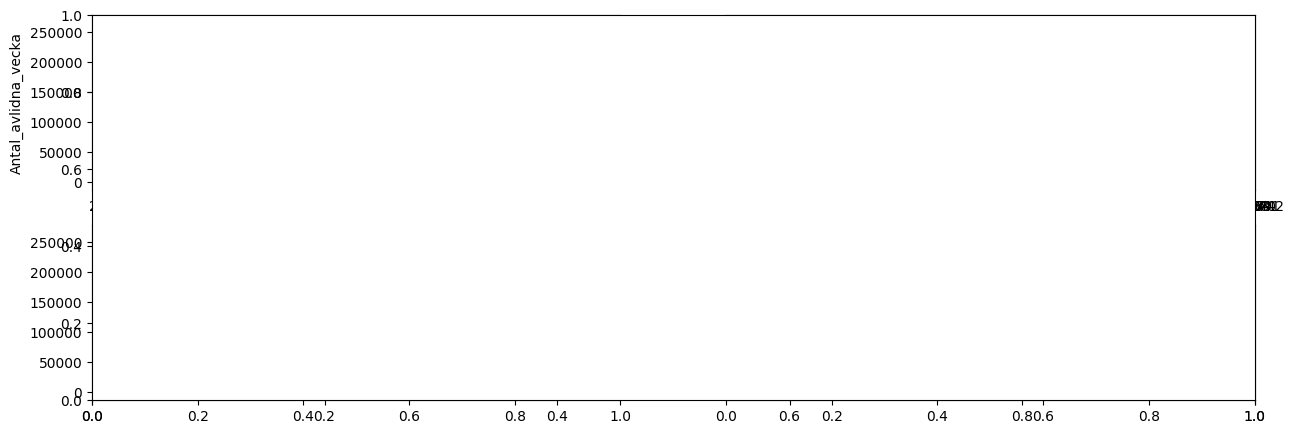

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5), sharey=True)
#fig.suptitle('Seaborn plot')

ax = plt.axes()
sns.lineplot(ax=axes[0, 0], data=df, x='Vecka', y='Antal_avlidna_vecka')
sns.boxplot(ax=axes[0, 1], data=df, x='Vecka', y='Antal_fall_vecka')
sns.boxplot(ax=axes[1, 0], data=df, x='Vecka', y=['Antal_avlidna_vecka','Antal_fall_vecka'])
sns.boxplot(ax=axes[1, 1], data=df, x='Vecka', y='Kum_antal_fall')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))



C:\Users\vinee\AppData\Local\Temp\ipykernel_88208\3706494111.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\vinee\AppData\Local\Temp\ipykernel_88208\3706494111.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



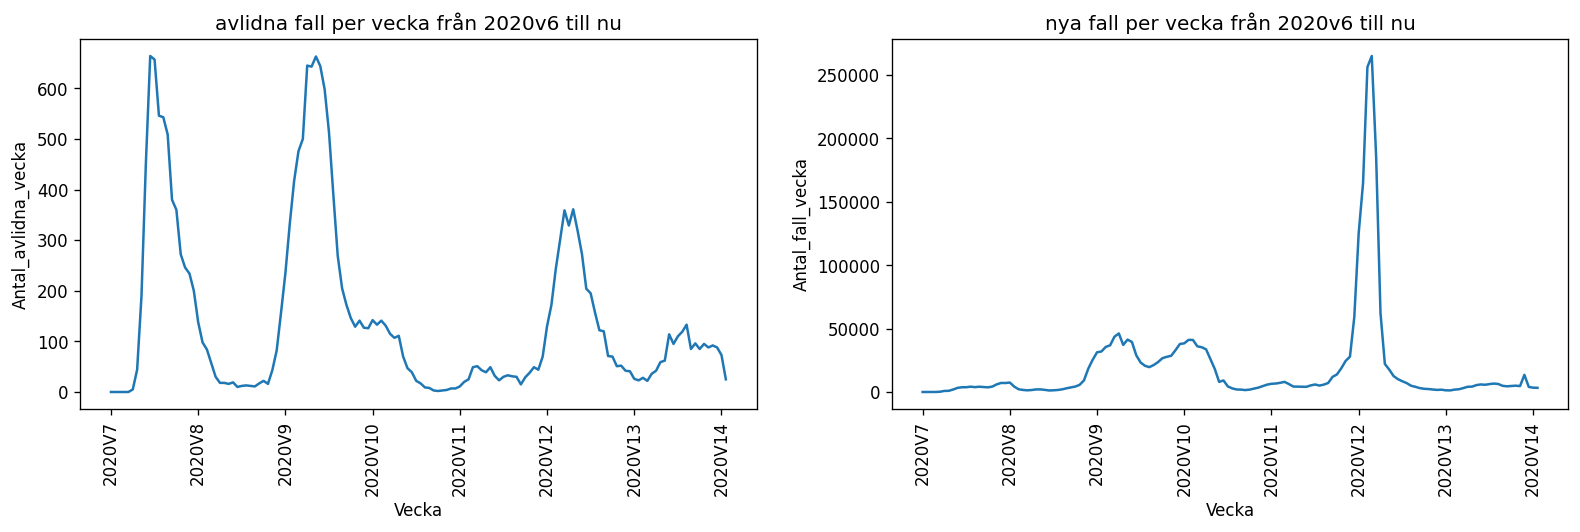

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4), dpi=120)
titles = ["avlidna fall per vecka från 2020v6 till nu", "nya fall per vecka från 2020v6 till nu"]
data_frames = (df["Antal_avlidna_vecka"], df["Antal_fall_vecka"])
y_columns = ["Antal_avlidna_vecka", "Antal_fall_vecka",]


for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.lineplot(data=df, x = "Vecka", y = y_columns[i], ax = axes[i])
    axes[i].set(title = title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(8))

#plt.savefig("../assets/top_calories_food.png", facecolor = "white", bbox_inches = "tight")